In [54]:
import h5py

dataPath = "data-15.07.08/7.2/000012.SZtick.mat"
f = h5py.File(dataPath,'r+')

In [55]:
f['r1'].keys()

<KeysViewHDF5 ['AccTurover', 'AccVolume', 'AskAvPrice', 'AskPrice', 'AskVolume', 'BSFlag', 'BidAvPrice', 'BidPrice', 'BidVolume', 'Code', 'CurDelta', 'Date', 'Downs', 'High', 'HoldLines', 'Index', 'Interest', 'Low', 'MatchItems', 'Open', 'Position', 'PreClose', 'PrePosition', 'PreSettle', 'Price', 'Settle', 'Stocks', 'Time', 'TotalAskVolume', 'TotalBidVolume', 'TradeFlag', 'Turover', 'Ups', 'Volume', 'WindCode']>

In [56]:
import numpy as np
import pandas as pd
keys = ['AccTurover', 'AccVolume', 'AskAvPrice', 'AskPrice', 'AskVolume', 'BSFlag', 'BidAvPrice', 'BidPrice', 'BidVolume', 'Code', 'CurDelta', 'Date', 'Downs', 'High', 'HoldLines', 'Index', 'Interest', 'Low', 'MatchItems', 'Open', 'Position', 'PreClose', 'PrePosition', 'PreSettle', 'Price', 'Settle', 'Stocks', 'Time', 'TotalAskVolume', 'TotalBidVolume', 'TradeFlag', 'Turover', 'Ups', 'Volume', 'WindCode']
data = []
for key in keys:
    data.append(f['r1'][key])

In [57]:
BidPrice = np.array(f['r1']['BidPrice'])
AskPrice = np.array(f['r1']['AskPrice'])
BidVolume = np.array(f['r1']['BidVolume'])
AskVolume = np.array(f['r1']['AskVolume'])
miu_n = BidVolume.astype(np.int) - AskVolume.astype(np.int)
miu_n

/tmp/ipykernel_15085/644035717.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  miu_n = BidVolume.astype(np.int) - AskVolume.astype(np.int)


array([[      0,       0,       0, ...,       0, -231480, -231480],
       [   3000,     700,    1000, ...,   54315,   66300,   66300],
       [      0,       0,       0, ...,       0,  185590,  185590],
       ...,
       [      0,       0,       0, ...,       0,  -93017,  -93017],
       [      0,       0,       0, ...,       0,   -7400,   -7400],
       [      0,       0,       0, ...,       0,  -42400,  -42400]])

In [58]:
miu_n_tmp = miu_n[0:1,:]
miu_n_final = np.sum(miu_n_tmp,axis=0)

In [59]:
miu_n_final

array([      0,       0,       0, ...,       0, -231480, -231480])

In [60]:
S_n = BidPrice[0] + AskPrice[0]
S_n = S_n / 2
for i in range(S_n.shape[0]):
    if i+1 < S_n.shape[0]:
        S_n[i] = S_n[i+1] - S_n[i]
indexes = []
for i in range(S_n.shape[0]):
    if 1000 > S_n[i] > -1000:
        indexes.append(i)

Text(0, 0.5, 'miu_n')

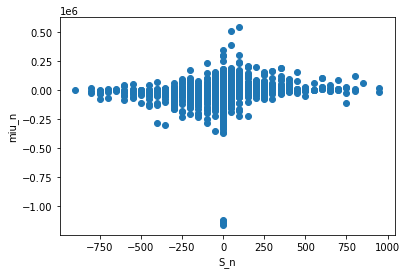

In [61]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(S_n[indexes],miu_n_final[indexes])
plt.xlabel('S_n')
plt.ylabel('miu_n')

In [62]:
miu_n_final

array([      0,       0,       0, ...,       0, -231480, -231480])